In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
from tqdm import tqdm_notebook
%matplotlib inline 

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
seaborn.set()

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

In [4]:
df_train = pd.read_csv("train.csv", parse_dates=[0], index_col=0,date_parser=dateparse)

In [5]:
df_train

,Ambient (°F),E (W/m²)
date,,
2003-01-01,64.400,559.4
2003-01-02,69.700,558.4
2003-01-03,74.500,556.6
2003-01-04,77.000,549.5
2003-01-05,74.200,554.3
2003-01-06,65.800,606.5
2003-01-07,75.700,581.7
2003-01-08,64.500,494.6
2003-01-09,66.000,619.2


In [6]:
dfAmbient = df_train[["Ambient (°F)"]]

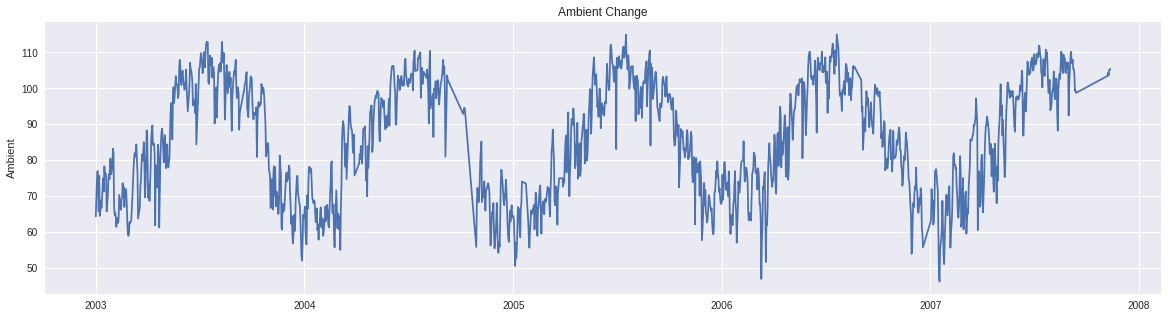

In [7]:
plt.figure(figsize=(20,5))
plt.plot(dfAmbient.index,dfAmbient["Ambient (°F)"])
plt.ylabel("Ambient")
plt.title("Ambient Change");
plt.show()

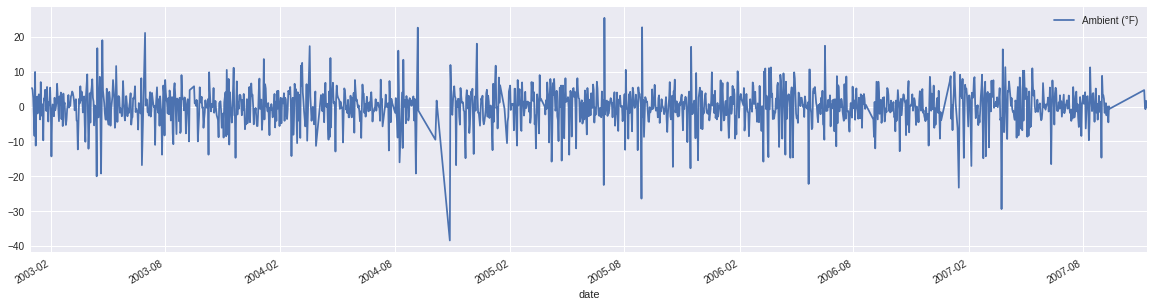

In [8]:
fig = plt.figure(figsize=(20,5))
ax1= fig.add_subplot(111)
diff1 = dfAmbient.diff()
diff1.plot(ax=ax1)

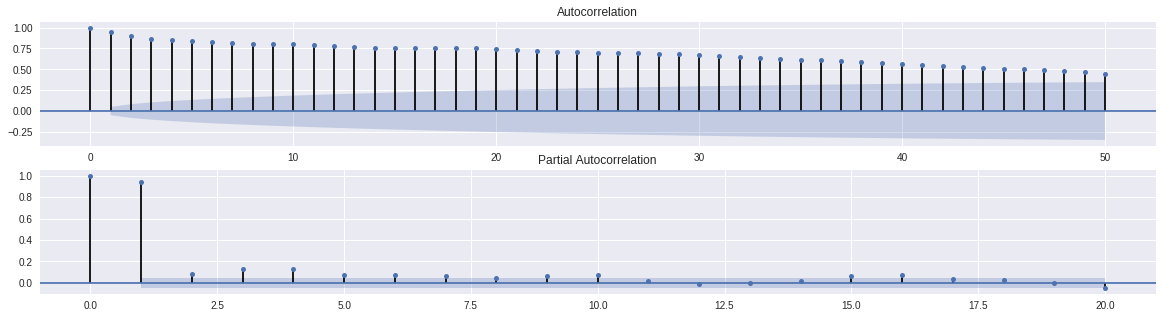

In [9]:
fig = plt.figure(figsize=(20,5))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfAmbient,lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfAmbient,lags=20,ax=ax2)

In [10]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [11]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [12]:
seasonal_pdq[1]

(0, 0, 1, 12)

In [13]:
maps = {}
bar = tqdm_notebook(total = 60)
for param in pdq:
    for parmas_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfAmbient, order=param,
                                           seasonal_order = parmas_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility = False)
            result = mod.fit()
            maps["AIRMA{}x{}12".format(param, parmas_seasonal)] = result.aic
        except:
            continue
        bar.update()

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
sorted(maps.items(), key=lambda x: x[1])

[('AIRMA(1, 1, 1)x(0, 1, 1, 12)12', 9423.8871774131785),
 ('AIRMA(1, 1, 1)x(1, 1, 1, 12)12', 9425.7518254447477),
 ('AIRMA(1, 1, 1)x(0, 0, 1, 12)12', 9447.9023876989359),
 ('AIRMA(1, 1, 1)x(1, 0, 1, 12)12', 9449.0186166235671),
 ('AIRMA(1, 1, 1)x(1, 0, 0, 12)12', 9453.6844908239327),
 ('AIRMA(1, 0, 1)x(0, 1, 1, 12)12', 9507.0877102591985),
 ('AIRMA(1, 0, 1)x(1, 1, 1, 12)12', 9508.6265552282748),
 ('AIRMA(1, 1, 1)x(0, 0, 0, 12)12', 9519.2841040620624),
 ('AIRMA(1, 0, 0)x(0, 1, 1, 12)12', 9524.946844095608),
 ('AIRMA(1, 0, 0)x(1, 1, 1, 12)12', 9526.1116599717825),
 ('AIRMA(0, 1, 1)x(0, 1, 1, 12)12', 9531.9164578530745),
 ('AIRMA(0, 1, 1)x(1, 1, 1, 12)12', 9533.6145727252078),
 ('AIRMA(1, 1, 0)x(0, 1, 1, 12)12', 9546.3514801706424),
 ('AIRMA(1, 1, 0)x(1, 1, 1, 12)12', 9547.7710187465964),
 ('AIRMA(0, 1, 1)x(0, 0, 1, 12)12', 9559.4091595830578),
 ('AIRMA(0, 1, 1)x(1, 0, 1, 12)12', 9560.1772458244122),
 ('AIRMA(0, 1, 0)x(0, 1, 1, 12)12', 9562.0616658959989),
 ('AIRMA(0, 1, 0)x(1, 1, 1, 12)1

In [15]:
mode = sm.tsa.statespace.SARIMAX(dfAmbient, order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result = mode.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6511   3025.160      0.000      1.000   -5928.553    5929.855
ma.L1         -0.8831   3.16e+10   -2.8e-11      1.000   -6.18e+10    6.18e+10
ma.S.L12      -0.9734   3.08e+10  -3.16e-11      1.000   -6.03e+10    6.03e+10
sigma2        26.2158   1.43e+09   1.84e-08      1.000   -2.79e+09    2.79e+09


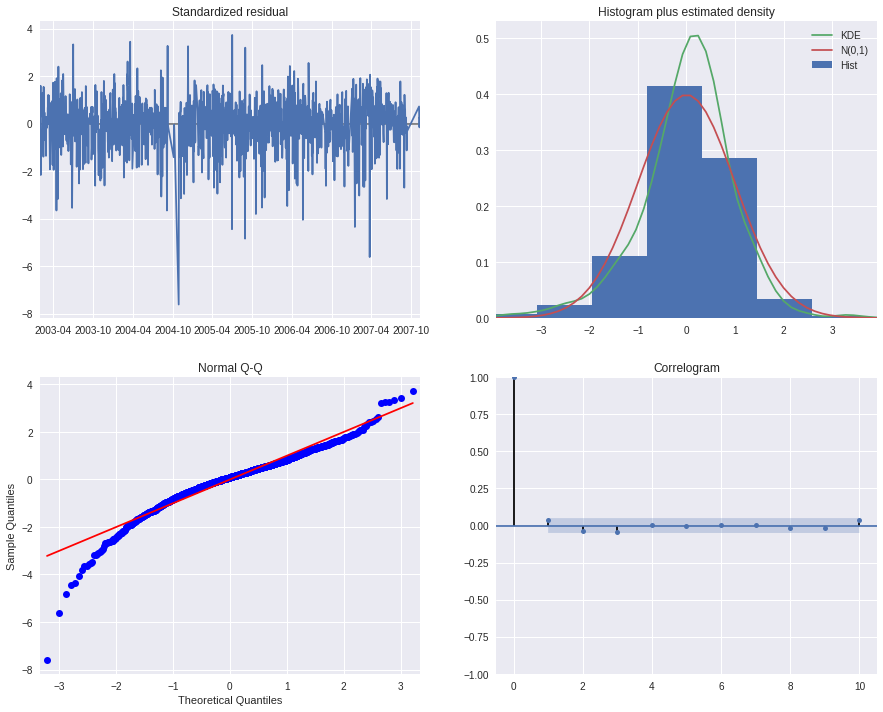

In [16]:
result.plot_diagnostics(figsize=(15,12))
plt.show()

In [17]:
pred = result.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci = pred.conf_int()

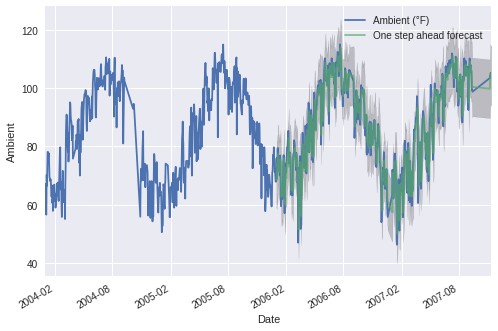

In [18]:
ax = dfAmbient["2004":].plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Ambient")
plt.legend()
plt.show()

In [19]:
forcast = pred.predicted_mean
truth = dfAmbient["2006-01-01":]

In [20]:
forcast = forcast.values.tolist()
truth = truth.values.tolist()
from sklearn.metrics import mean_squared_error
mean_squared_error(truth,forcast)

24.879320177926591

In [21]:
dfIr = df_train[["E (W/m²)"]]

In [22]:
maps = {}
bar = tqdm_notebook(total = 60)
for param in pdq:
    for parmas_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dfIr, order=param,
                                           seasonal_order = parmas_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility = False)
            result = mod.fit()
            maps["AIRMA{}x{}12".format(param, parmas_seasonal)] = result.aic
        except:
            continue
        bar.update()

In [23]:
sorted(maps.items(), key=lambda x: x[1])

[('AIRMA(1, 1, 1)x(0, 1, 1, 12)12', 18336.04998293391),
 ('AIRMA(1, 1, 1)x(1, 1, 1, 12)12', 18337.9083489275),
 ('AIRMA(0, 1, 1)x(0, 1, 1, 12)12', 18344.911232316943),
 ('AIRMA(1, 0, 1)x(0, 1, 1, 12)12', 18345.762107542851),
 ('AIRMA(0, 1, 1)x(1, 1, 1, 12)12', 18346.876752236974),
 ('AIRMA(1, 0, 1)x(1, 1, 1, 12)12', 18347.591206090641),
 ('AIRMA(1, 1, 1)x(0, 0, 1, 12)12', 18427.006221699605),
 ('AIRMA(1, 1, 1)x(1, 0, 1, 12)12', 18428.878718138534),
 ('AIRMA(0, 1, 1)x(0, 0, 1, 12)12', 18436.296073134454),
 ('AIRMA(1, 1, 1)x(1, 0, 0, 12)12', 18437.995228457476),
 ('AIRMA(0, 1, 1)x(1, 0, 1, 12)12', 18438.180006025839),
 ('AIRMA(1, 0, 1)x(0, 0, 1, 12)12', 18449.7159829261),
 ('AIRMA(1, 0, 1)x(1, 0, 1, 12)12', 18458.099443230542),
 ('AIRMA(0, 1, 1)x(1, 0, 0, 12)12', 18458.208662423989),
 ('AIRMA(1, 0, 1)x(1, 0, 0, 12)12', 18467.310904720147),
 ('AIRMA(1, 1, 1)x(0, 0, 0, 12)12', 18559.476037263976),
 ('AIRMA(0, 1, 1)x(0, 0, 0, 12)12', 18568.53873601072),
 ('AIRMA(1, 0, 1)x(0, 0, 0, 12)12', 1

In [24]:
modeIr = sm.tsa.statespace.SARIMAX(dfIr, order=(1, 1, 1),seasonal_order=(0, 1, 1, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
resultIr = modeIr.fit()
print(resultIr.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1149      6.202      0.019      0.985     -12.041      12.271
ma.L1         -0.7965   3.84e+06  -2.08e-07      1.000   -7.52e+06    7.52e+06
ma.S.L12      -1.0000   2.51e+06  -3.98e-07      1.000   -4.93e+06    4.93e+06
sigma2      8489.0182    142.374     59.625      0.000    8209.970    8768.066


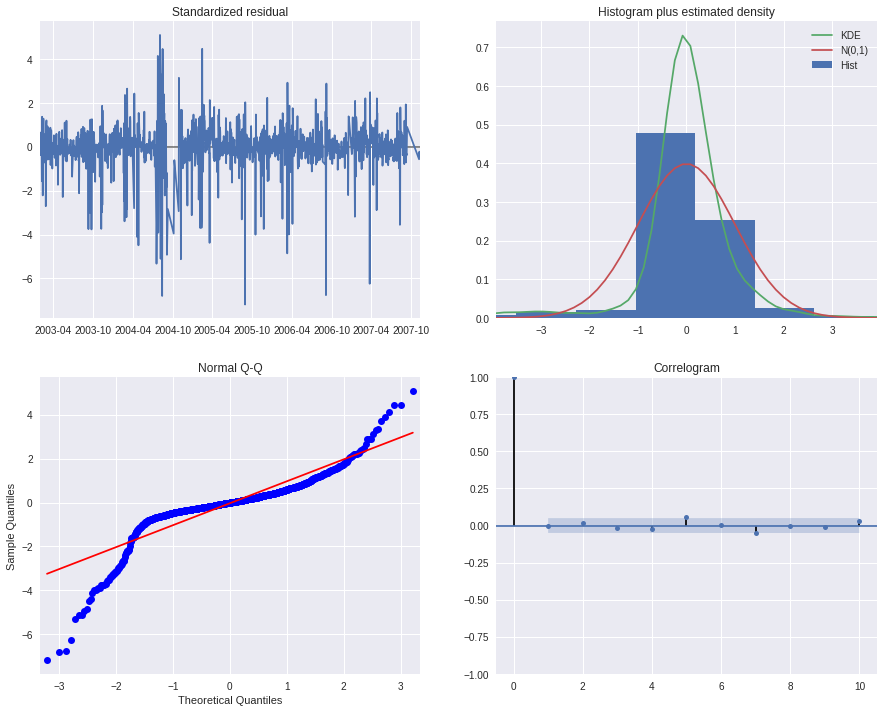

In [25]:
resultIr.plot_diagnostics(figsize=(15,12))
plt.show()

In [26]:
predIr = resultIr.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci_Ir = predIr.conf_int()

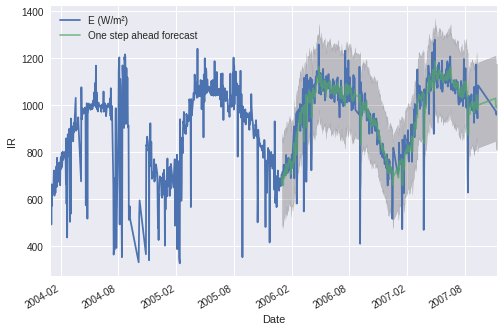

In [27]:
ax = dfIr["2004":].plot(label="observed")
predIr.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci_Ir.index,pred_ci_Ir.iloc[:,0],pred_ci_Ir.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("IR")
plt.legend()
plt.show()

In [28]:
forcast_IR = predIr.predicted_mean
truth_IR = dfIr["2006-01-01":]

In [29]:
forcast_IR = forcast_IR.values.tolist()
truth_IR = truth_IR.values.tolist()
mean_squared_error(truth_IR,forcast_IR)

5795.7207857388958

In [34]:
import itertools
p = q = range(0,10)
pq = list(itertools.product(p,q))

In [35]:
maps = {}
for param in pq:
    try:
        mod = sm.tsa.VARMAX(df_train, order=param, enforce_invertibility=False, enforce_stationarity=False)
        result = mod.fit()
        maps["VAR{}".format(param)] = result.aic
        print("VAR{}-AIC:{}".format(param, result.aic))
    except:
        continue

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 1)-AIC:40243.07396389944


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 2)-AIC:37954.41255579746


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 3)-AIC:33980.577210497475


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 4)-AIC:33010.49678085126


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 5)-AIC:32304.246657227985


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 6)-AIC:31566.9321758146


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 7)-AIC:31326.95154930243


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 8)-AIC:30975.41538733083


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(0, 9)-AIC:30725.763765647825
VAR(1, 0)-AIC:28500.383140745693


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:153: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 1)-AIC:28396.623627458775


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 2)-AIC:28366.8047747754


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 3)-AIC:28322.690651147495


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 4)-AIC:28318.71660944829


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 5)-AIC:28357.735029352974
VAR(1, 6)-AIC:28266.090114826


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 7)-AIC:28276.228487387365


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 8)-AIC:28415.20732529526


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(1, 9)-AIC:28371.38693646273


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:202: RuntimeWarning: overflow encountered in true_divide
  for i, ih in enumerate(increments)]


VAR(2, 0)-AIC:2612067239.29248


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 1)-AIC:28289.299180819587


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 2)-AIC:28209.417968268594


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 3)-AIC:28206.230393522994


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 4)-AIC:28247.22576783009


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 5)-AIC:28205.34314185234


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 6)-AIC:28198.8070993512


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 7)-AIC:28214.477463319414


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 8)-AIC:28229.52529018178


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(2, 9)-AIC:28240.689518843235
VAR(3, 0)-AIC:548539632295643.4


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 1)-AIC:28206.113010141115


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 2)-AIC:28195.044086710157


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 3)-AIC:28138.349414912333


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 4)-AIC:28149.09969845556


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 5)-AIC:28134.22559560927


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 6)-AIC:28140.807016119776


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 7)-AIC:28161.045362491237


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 8)-AIC:28175.570501488226


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(3, 9)-AIC:28186.330333922655


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 0)-AIC:28133.696696236082


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 1)-AIC:28140.18919736029


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 2)-AIC:28141.201628173214


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 3)-AIC:28138.304638181104


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 4)-AIC:28115.010764303253
VAR(4, 5)-AIC:28098.647367645382


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 6)-AIC:28107.440374817335


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 7)-AIC:28118.71140733782


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 8)-AIC:28133.197626497094


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(4, 9)-AIC:28137.902882662333


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 0)-AIC:28080.670443511823


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 1)-AIC:28088.367817343587


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 2)-AIC:28095.498159161907


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 3)-AIC:28100.25564326112


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 4)-AIC:28102.6189445626


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 5)-AIC:28088.969778327275


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 6)-AIC:28092.2238821087


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 7)-AIC:28096.58127955858


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 8)-AIC:28103.727024036853


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(5, 9)-AIC:28109.642742244345


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 0)-AIC:28068.26975709977


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 1)-AIC:28076.26427951354


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 2)-AIC:28084.066449042995


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 3)-AIC:28090.672310263115


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 4)-AIC:28095.673188798246


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 5)-AIC:28100.073945481003


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 6)-AIC:28093.882644547193


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 7)-AIC:28093.41118371997


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 8)-AIC:28098.239258931564


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(6, 9)-AIC:28103.019318962513


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 0)-AIC:28064.731094452116


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 1)-AIC:28072.74854322881


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 2)-AIC:28080.635448594607


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 3)-AIC:28087.71876093062


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 4)-AIC:28093.600860122806


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 5)-AIC:28098.951904118272


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 6)-AIC:28103.288002486894


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 7)-AIC:28100.059555749373


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 8)-AIC:28101.57911675558


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(7, 9)-AIC:28104.008004472074


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 1)-AIC:28071.26527874906


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 2)-AIC:28079.190010491857


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 3)-AIC:28086.836472042723


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 4)-AIC:28093.83520207472


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 5)-AIC:28100.659897783797


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 6)-AIC:28106.6042381858


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 7)-AIC:28110.839575044723


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 8)-AIC:28107.527677581398


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(8, 9)-AIC:28107.684998318462


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 0)-AIC:28057.540640802396


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 1)-AIC:28065.38116815469


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 2)-AIC:28073.362068683076


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 3)-AIC:28081.2876592647


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 4)-AIC:28089.097207975698


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 5)-AIC:28096.7471812039


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 6)-AIC:28103.44788012866


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 7)-AIC:28109.26386196954


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 8)-AIC:28116.084840873224


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


VAR(9, 9)-AIC:28109.446559730524


In [36]:
sorted(maps.items(), key=lambda x: x[1])

[('VAR(9, 0)', 28057.540640802396),
 ('VAR(7, 0)', 28064.731094452116),
 ('VAR(9, 1)', 28065.38116815469),
 ('VAR(6, 0)', 28068.26975709977),
 ('VAR(8, 1)', 28071.265278749059),
 ('VAR(7, 1)', 28072.748543228809),
 ('VAR(9, 2)', 28073.362068683076),
 ('VAR(6, 1)', 28076.26427951354),
 ('VAR(8, 2)', 28079.190010491857),
 ('VAR(7, 2)', 28080.635448594607),
 ('VAR(5, 0)', 28080.670443511823),
 ('VAR(9, 3)', 28081.287659264701),
 ('VAR(6, 2)', 28084.066449042995),
 ('VAR(8, 3)', 28086.836472042723),
 ('VAR(7, 3)', 28087.71876093062),
 ('VAR(5, 1)', 28088.367817343587),
 ('VAR(5, 5)', 28088.969778327275),
 ('VAR(9, 4)', 28089.097207975698),
 ('VAR(6, 3)', 28090.672310263115),
 ('VAR(5, 6)', 28092.223882108701),
 ('VAR(6, 7)', 28093.411183719971),
 ('VAR(7, 4)', 28093.600860122806),
 ('VAR(8, 4)', 28093.835202074719),
 ('VAR(6, 6)', 28093.882644547193),
 ('VAR(5, 2)', 28095.498159161907),
 ('VAR(6, 4)', 28095.673188798246),
 ('VAR(5, 7)', 28096.581279558581),
 ('VAR(9, 5)', 28096.7471812039)

In [37]:
varmode = sm.tsa.VARMAX(df_train, order=(9,0),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result_var = varmode.fit()
print(result_var.summary().tables[1])

/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Ljung-Box (Q):                58.21, 51.89   Jarque-Bera (JB):     5779.89, 9604.62
Prob(Q):                        0.03, 0.10   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.01, 1.01   Skew:                      1.37, -1.82
Prob(H) (two-sided):            0.95, 0.92   Kurtosis:                 12.01, 14.58


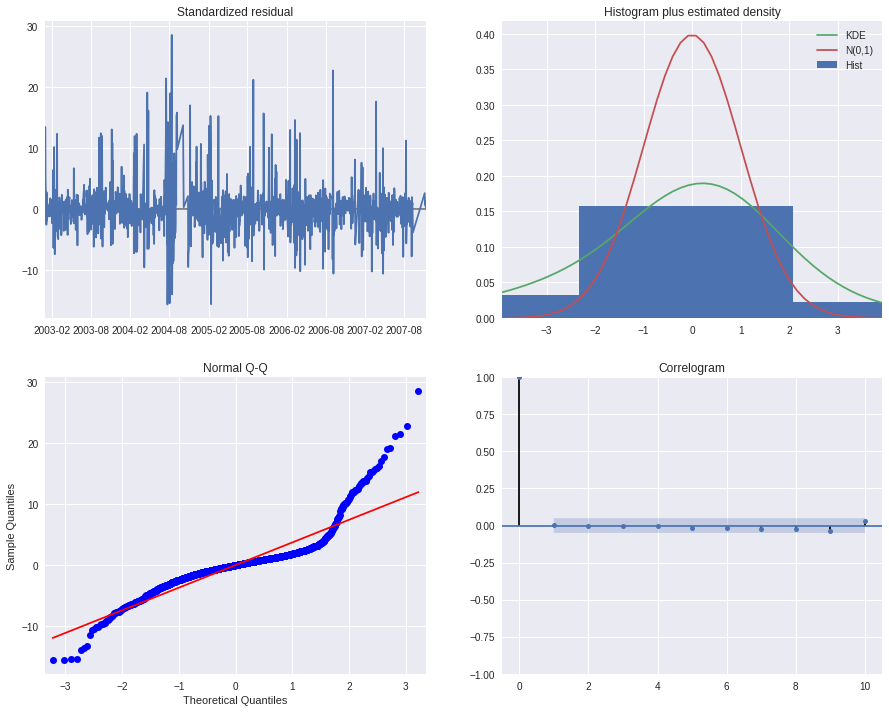

In [38]:
result_var.plot_diagnostics(figsize=(15,12))
plt.show()

In [39]:
pred_var = result_var.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci_var = pred_var.conf_int()

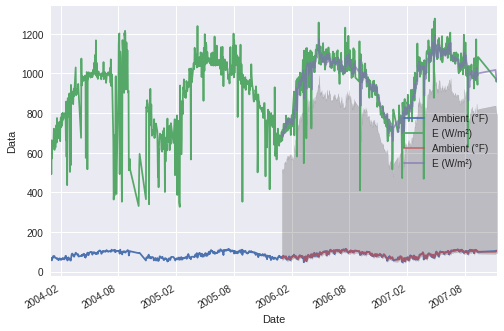

In [55]:
ax = df_train["2004":].plot(label="observed")
pred_var.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci_var.index,pred_ci_var.iloc[:,0],pred_ci_var.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Data")
plt.legend()
plt.show()

In [41]:
forcast_var = pred_var.predicted_mean
truth_var = df_train["2006-01-01":]

In [42]:
forcast_var = forcast_var.values.tolist()
truth_var = truth_var.values.tolist()

In [43]:
forcast_var_ab = list(map(lambda x: x[0], forcast_var))
forcast_var_ir = list(map(lambda x: x[1], forcast_var))
truth_var_ab = list(map(lambda x: x[0], truth_var))
truth_var_ir = list(map(lambda x: x[1], truth_var))

In [44]:
mse_ab = mean_squared_error(truth_var_ab, forcast_var_ab)
mse_ir = mean_squared_error(truth_var_ir, forcast_var_ir)

In [45]:
mse_ab

23.919317044343789

In [46]:
mse_ir

5596.9373266911725

In [50]:
maps = {}
for (k,o) in pq:
    try:
        mod = sm.tsa.DynamicFactor(df_train, k_factors=k, factor_order=o, enforce_invertibility=False, enforce_stationarity=False)
        result = mod.fit()
        maps["DF{}-{}".format(k,o)] = result.aic
        print("DF{}-{}-AIC:{}".format(k,o, result.aic))
    except:
        continue

DF0-0-AIC:44248.01473775089
DF0-1-AIC:44248.01473775089
DF0-2-AIC:44248.01473775089
DF0-3-AIC:44248.01473775089
DF0-4-AIC:44248.01473775089
DF0-5-AIC:44248.01473775089
DF0-6-AIC:44248.01473775089
DF0-7-AIC:44248.01473775089
DF0-8-AIC:44248.01473775089
DF0-9-AIC:44248.01473775089
DF1-0-AIC:38689.52891428034


/home/dang/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:628: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-1-AIC:43147.43946555302


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-2-AIC:42944.15753227476


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-3-AIC:42975.50160047734


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-4-AIC:42972.74557591962


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-5-AIC:42980.516881858304


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-6-AIC:43364.58558811073


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/tools/numdiff.py:202: RuntimeWarning: overflow encountered in true_divide
  for i, ih in enumerate(increments)]


DF1-7-AIC:72174.55081132925


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-8-AIC:42993.58315019054


/home/dang/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


DF1-9-AIC:43001.523023679314


In [51]:
sorted(maps.items(), key=lambda x: x[1])

[('DF1-0', 38689.528914280338),
 ('DF1-2', 42944.157532274759),
 ('DF1-4', 42972.745575919616),
 ('DF1-3', 42975.501600477342),
 ('DF1-5', 42980.516881858304),
 ('DF1-8', 42993.583150190541),
 ('DF1-9', 43001.523023679314),
 ('DF1-1', 43147.43946555302),
 ('DF1-6', 43364.585588110727),
 ('DF0-0', 44248.014737750891),
 ('DF0-1', 44248.014737750891),
 ('DF0-2', 44248.014737750891),
 ('DF0-3', 44248.014737750891),
 ('DF0-4', 44248.014737750891),
 ('DF0-5', 44248.014737750891),
 ('DF0-6', 44248.014737750891),
 ('DF0-7', 44248.014737750891),
 ('DF0-8', 44248.014737750891),
 ('DF0-9', 44248.014737750891),
 ('DF1-7', 72174.550811329245)]

In [52]:
dfmode = sm.tsa.DynamicFactor(df_train, k_factors=1, factor_order=0,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
result_df = dfmode.fit()
print(result_df.summary().tables[1])

Ljung-Box (Q):          23706.51, 24045.21   Jarque-Bera (JB):       138.04, 136.00
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         1.37, 1.36   Skew:                      0.73, -0.72
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   3.11, 3.06


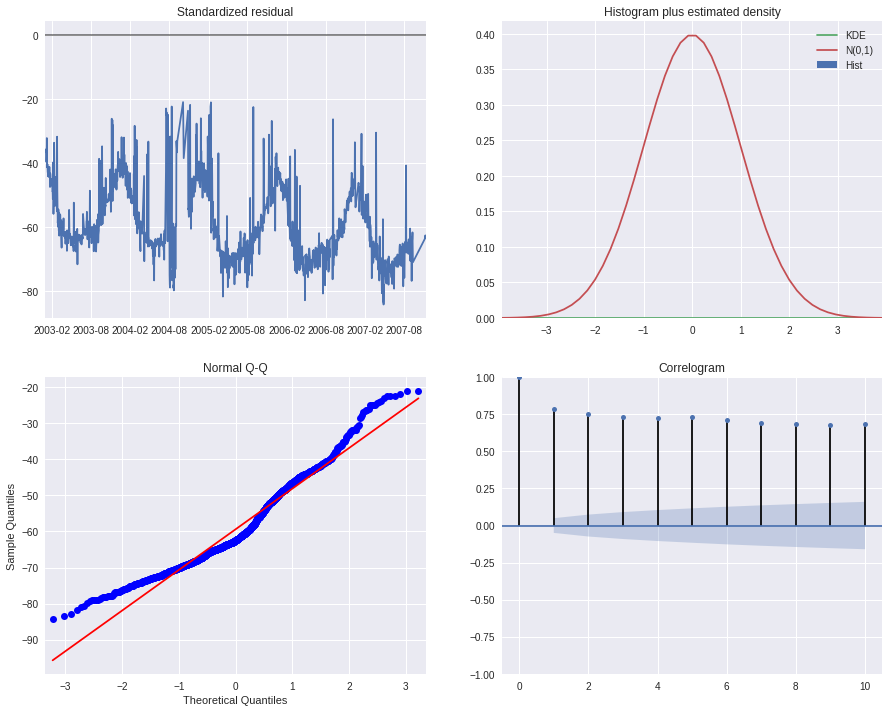

In [53]:
result_df.plot_diagnostics(figsize=(15,12))
plt.show()

In [54]:
pred_df = result_df.get_prediction(start=pd.to_datetime("2006-01-01"),dynamic=False)
pred_ci_df = pred_df.conf_int()

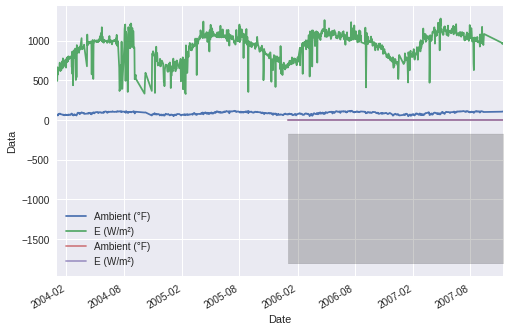

In [56]:
ax = df_train["2004":].plot(label="observed")
pred_df.predicted_mean.plot(ax=ax, label="One step ahead forecast",alpha=0.7)
ax.fill_between(pred_ci_df.index,pred_ci_df.iloc[:,0],pred_ci_df.iloc[:,1],color="k",alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Data")
plt.legend()
plt.show()

In [57]:
forcast_df = pred_var.predicted_mean
truth_df = df_train["2006-01-01":]

In [58]:
forcast_df = forcast_df.values.tolist()
truth_df = truth_df.values.tolist()

In [59]:
forcast_df_ab = list(map(lambda x: x[0], forcast_df))
forcast_df_ir = list(map(lambda x: x[1], forcast_df))
truth_df_ab = list(map(lambda x: x[0], truth_df))
truth_df_ir = list(map(lambda x: x[1], truth_df))

In [60]:
mse_ab = mean_squared_error(truth_df_ab, forcast_df_ab)
mse_ir = mean_squared_error(truth_df_ir, forcast_df_ir)

In [61]:
mse

NameError: name 'mse' is not defined